# Guided Project: Star Wars Survey
## Introduction

In this project, we'll work with Jupyter notebook and analyze data on the Star Wars movies. 

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed *Star Wars* fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

## 2. Overview

In [25]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head(10)
star_wars.columns


star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The data has several columns, including the following:

- RespondentID — An anonymized ID for the respondent (person taking the survey)
- Gender — the respondent's gender
- Age — the respondent's age
- Household Income — the respondent's income
- Education — the respondent's education level
- Location (Census Region) — the respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response


There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

In [26]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## 3. Cleaning and Mapping Yes/No Columns

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question. We can use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

We can use the pandas.Series.map() method on series objects to perform the conversion.

In [27]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

#defining the mapping dictionary
yes_no = {"Yes": True,"No": False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()


True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [28]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()


True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

# 4. Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:


- Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [29]:
## cleaning the movie tick boxes
import numpy as np

#defining the mapping dictionary
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

cols = ['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']

for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(movie_mapping)
    
star_wars.head()
    

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [30]:
#renaming columns to something more intuitive


star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    'Unnamed: 4': "seen_2",
    'Unnamed: 5': "seen_3",
    'Unnamed: 6': "seen_4",
    'Unnamed: 7': "seen_5",
    'Unnamed: 8': "seen_6"
})

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# 5. Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

In [31]:
#converting columns 9-14 to floats

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


#renaming those columns to be intiutive
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    'Unnamed: 10': "ranking_2",
    'Unnamed: 11': "ranking_3",
    'Unnamed: 12': "ranking_4",
    'Unnamed: 13': "ranking_5",
    'Unnamed: 14': "ranking_6"
})

star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

# 6. Finding the Highest-Ranked Movie

To do this, we take the mean of each ranking columns using the `pandas.DataFrame.mean()` method on DataFrames.

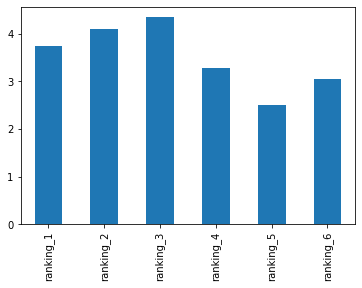

In [32]:
#visualisations
%matplotlib inline

import matplotlib.pyplot as plt

star_wars[star_wars.columns[9:15]].mean().plot.bar()

We cleaned data and now it is obvious that the mean ranking for the 5th movie is the best, followed by the 6th movie.

# 7. Finding the Most Viewed Movie

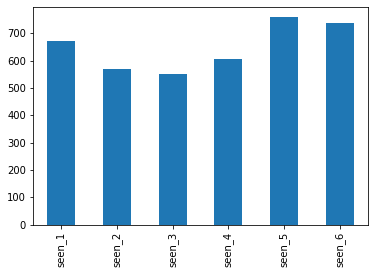

In [33]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

The highest ranked movies have been seen the most and the lowest ranked movies have been seen the least. 

# 8. Exploring the Data by Binary Segments

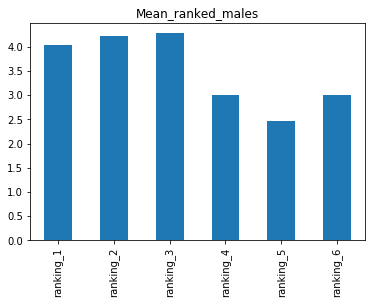

In [34]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

males[males.columns[9:15]].mean().plot.bar(title = 'Mean_ranked_males')


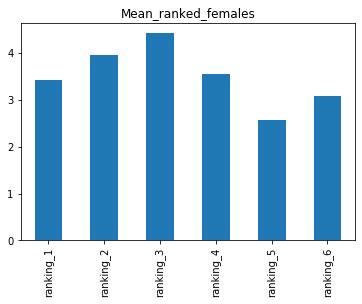

In [35]:
females[females.columns[9:15]].mean().plot.bar(title = 'Mean_ranked_females')

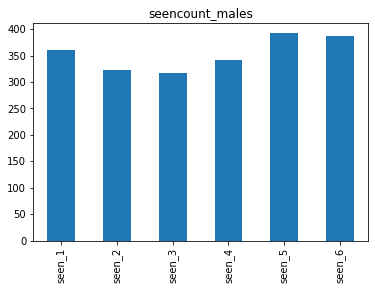

In [36]:
males[males.columns[3:9]].sum().plot.bar(title = 'seencount_males')



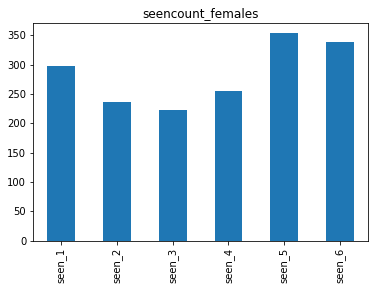

In [37]:
females[females.columns[3:9]].sum().plot.bar(title = 'seencount_females')

More guys have seen 1-3 but they ranked it worse